In [1]:
#---- ch04/import
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#---- for high-quality plots
# import matplotlib
# matplotlib.rcParams['figure.dpi'] = 196

## 挿入用のコード

In [3]:
#---- ch04/3d-array-zero
T, d = 3, 2
x = np.zeros((T, d, 1))
x

array([[[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]]])

In [4]:
#---- ch04/3d-array-initial
x[0] = np.array([[1],
                 [2]])
x

array([[[1.],
        [2.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]]])

In [5]:
#---- ch04/transition-matrix
A = np.array([[0.5, -0.2],
              [1.0, 0.0]])
A

array([[ 0.5, -0.2],
       [ 1. ,  0. ]])

In [6]:
#---- ch04/simulation
for t in range(1, T):
    x[t] = A @ x[t-1]

x

array([[[ 1.  ],
        [ 2.  ]],

       [[ 0.1 ],
        [ 1.  ]],

       [[-0.15],
        [ 0.1 ]]])

In [7]:
#---- ch04/reshape
x.shape = (T, d)
x

array([[ 1.  ,  2.  ],
       [ 0.1 ,  1.  ],
       [-0.15,  0.1 ]])

In [8]:
#---- ch04/import-linalg
import scipy.linalg as LA
import matplotlib.pyplot as plt

In [9]:
#---- ch04/define-A1
A1 = np.array([[0.8, 0.1],
               [0.5, 1.2]])

In [10]:
#---- ch04/eigen-A1
E, V = LA.eig(A1)
np.abs(E)

array([0.7, 1.3])

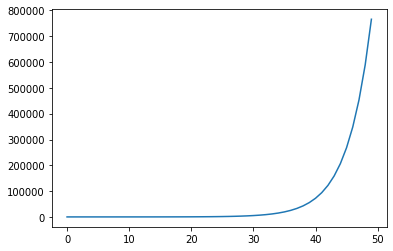

In [11]:
#---- ch04/unstable-A1/plot
N = 50
x = np.zeros(N)

An = np.eye(A1.shape[0])
x[0] = np.sum(np.abs(An))       # Σ|a_n|
for n in range(1, N):
    An = An @  A1
    x[n] = np.sum(np.abs(An))   # Σ|a_n| 
    
plt.plot(x)

In [12]:
#---- ch04/define-A2
A2 = np.array([[0.7, -0.1],
              [0.3, 1.05]])

E, V = LA.eig(A2)
np.abs(E)

array([0.85, 0.9 ])

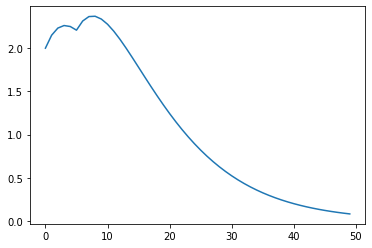

In [13]:
#---- ch04/stable-A2/graphics
N = 50
x = np.zeros(N)

An = np.eye(A2.shape[0])
x[0] = np.sum(np.abs(An))       # Σ|a_n|
for n in range(1, N):
    An = An @  A2
    x[n] = np.sum(np.abs(An))   # Σ|a_n| 
    
plt.plot(x)

In [14]:
#---- ch04/inverse-formula
I = np.eye(A2.shape[0])
S = I
for n in range(1, 200):
    S = I + A2 @ S
    
np.allclose((I - A2) @ S, I)

True

### AR

In [15]:
#---- ch04/ar-coeff
A = np.array([[0.6, 0.3],
              [1.0, 0.0]])

In [16]:
#---- ch04/ar-eig
E, V = LA.eig(A)
np.abs(E)

array([0.9244998, 0.3244998])

In [17]:
#---- ch04/ar-coeff-other
B = np.array([[1.0],
              [0.0]])
C = np.array([[1.0, 0.0]])
x0 = np.array([[0.0],
               [0.0]])

In [18]:
#---- ch04/ar-noise
rng = np.random.default_rng(1234)    # 124 は再現性のため
rng.normal(loc=0, scale=1.0, size=(3, 1, 1))

array([[[-1.60383681]],

       [[ 0.06409991]],

       [[ 0.7408913 ]]])

In [19]:
#---- ch04/ar-simulation
T, d = 300, 2
x = np.empty((T, d, 1))
y = np.empty((T, 1, 1))
eps = rng.normal(loc=0, scale=1.0, size=(T, 1, 1))

x[0] = x0
y[0] = C @ x[0]

for t in range(1, T):
    x[t] = A @ x[t-1] + B @ eps[t]
    y[t] = C @ x[t]
    
y.shape = (T, )
y[:5]

array([0.        , 0.86374389, 3.43134556, 0.83910714, 2.47834093])

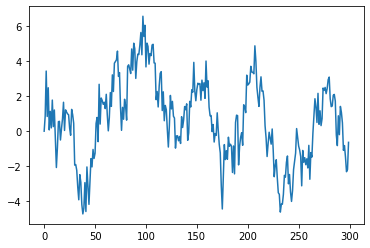

In [20]:
#---- ch04/ar-plot/plot
plt.plot(y)

## 推定

In [21]:
#---- ch04/import-tsa
import statsmodels.tsa.api as tsa

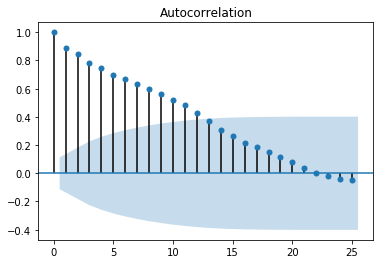

In [22]:
#---- ch04/acf/plot
tsa.graphics.plot_acf(y)
plt.show()

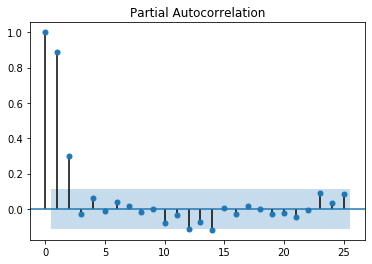

In [23]:
#---- ch04/pacf/plot
tsa.graphics.plot_pacf(y)
plt.show()

In [25]:
#---- ch04/ar-estimate
mod = tsa.SARIMAX(y, order=(2, 0, 0))
result = mod.fit() 

In [26]:
#---- ch04/ar-params
result.params

array([0.61992881, 0.30241651, 1.05848814])

In [27]:
#---- ch04/ar-summary/dnr
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  300
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -435.085
Date:                Wed, 03 Jun 2020   AIC                            876.169
Time:                        11:59:23   BIC                            887.281
Sample:                             0   HQIC                           880.616
                                - 300                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6199      0.057     10.804      0.000       0.507       0.732
ar.L2          0.3024      0.056      5.389      0.000       0.192       0.412
sigma2         1.0585      0.090     11.747      0.000       0.882       1.235
===================================================================================
Ljung-Box (Q):                       32.31   Jarque-Bera (JB):                 0.34
Prob(Q):                              0.80   Prob(JB):                         0.84
Heteroskedasticity (H):               0.64   Skew:                             0.02
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""